<a href="https://colab.research.google.com/github/wellydiallo/Personal-project-e-commerce-sales-analysis-sql/blob/main/E_commerce_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import sqlite3
import pandas as pd

# Créer une base de données en mémoire
conn = sqlite3.connect(':memory:')

df_products = pd.read_csv('products.csv')
df_customers = pd.read_csv('customers.csv')
df_orders = pd.read_csv('orders.csv')
df_order_items = pd.read_csv('order_items.csv')
df_sellers = pd.read_csv('sellers.csv')
df_payments = pd.read_csv('payments.csv')


#send in SQLite
df_products.to_sql('products', conn, index=False, if_exists='replace')
df_customers.to_sql('customers', conn, index=False, if_exists='replace')
df_orders.to_sql('orders', conn, index=False, if_exists='replace')
df_order_items.to_sql('order_items', conn, index=False, if_exists='replace')
df_sellers.to_sql('sellers', conn, index=False, if_exists='replace')
df_payments.to_sql('payments', conn, index=False, if_exists='replace')



df_sellers.shape

(3095, 4)

In [29]:
df_payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [28]:
df_order_items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [25]:
df_sellers.isnull().sum() #it's perfect that we have the informations of all the sellers

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [21]:
df_orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [19]:
df_customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [27]:
df_products['product category'] = df_products['product category'].fillna('Unknown') #i create a new categories for the products that don't have any, the company should define some categories for this products
df_products['product_name_length'] = df_products['product category'].fillna(7) #i use 7 as default value because 'Unknow' has 7 letters
df_products['product_description_length'] = df_products['product_description_length'].fillna(0) #i recommend adding description. Customers usually prefer to read a description before making purchase
df_products['product_photos_qty'] = df_products['product_photos_qty'].fillna(0) #i assume that there is no photo for this product, the company should check their inventory to add pictures when needed
df_products['product_weight_g'] = df_products['product_weight_g'].fillna(df_products['product_weight_g'].mean())
df_products['product_length_cm'] = df_products['product_length_cm'].fillna(df_products['product_length_cm'].mean())
df_products['product_height_cm'] = df_products['product_height_cm'].fillna(df_products['product_height_cm'].mean())
df_products['product_width_cm'] = df_products['product_width_cm'].fillna(df_products['product_width_cm'].mean())

df_products.isnull().sum()

,0
product_id,0
product category,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [16]:
query = """
SELECT [product category] AS category,
       COUNT(*) AS total_products
FROM products
GROUP BY category
ORDER BY total_products DESC
LIMIT 10
"""

df_top_categories = pd.read_sql_query(query, conn)
df_top_categories

#it shows the top 10 product categories that contain the most products in the dataset. Bed_bath_table is the category with the largest number of different products
#it would be interesting for the company to focus on these categories for marketing compaigns to increase sales
#we can suppose that the categories generate the most revenue

,category,total_products
0,bed table bath,3029
1,sport leisure,2867
2,Furniture Decoration,2657
3,HEALTH BEAUTY,2444
4,housewares,2335
5,automotive,1900
6,computer accessories,1639
7,toys,1411
8,Watches present,1329
9,telephony,1134


/tmp/ipython-input-17-2504108446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_categories, x='total_products', y='category', palette='viridis')


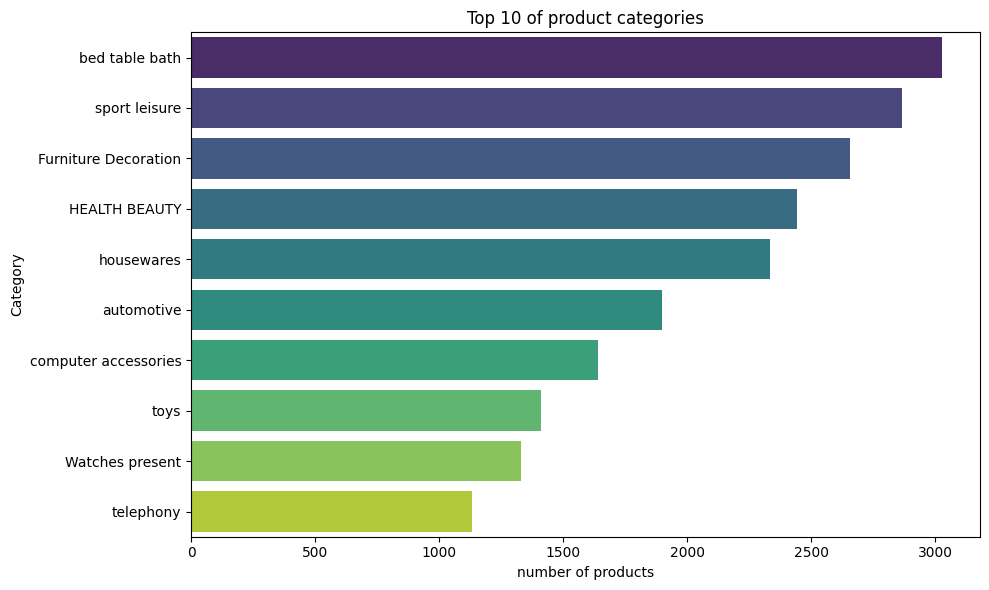

In [17]:
#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df_top_categories, x='total_products', y='category', palette='viridis')
plt.title("Top 10 of product categories")
plt.xlabel("number of products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [ ]:
query= """SELECT COUNT(DISTINCT [product category]) AS total_categories
FROM products;"""
df = pd.read_sql_query(query, conn)
df

#it's interesting to see that there is not only 10 categories

,total_categories
0,73


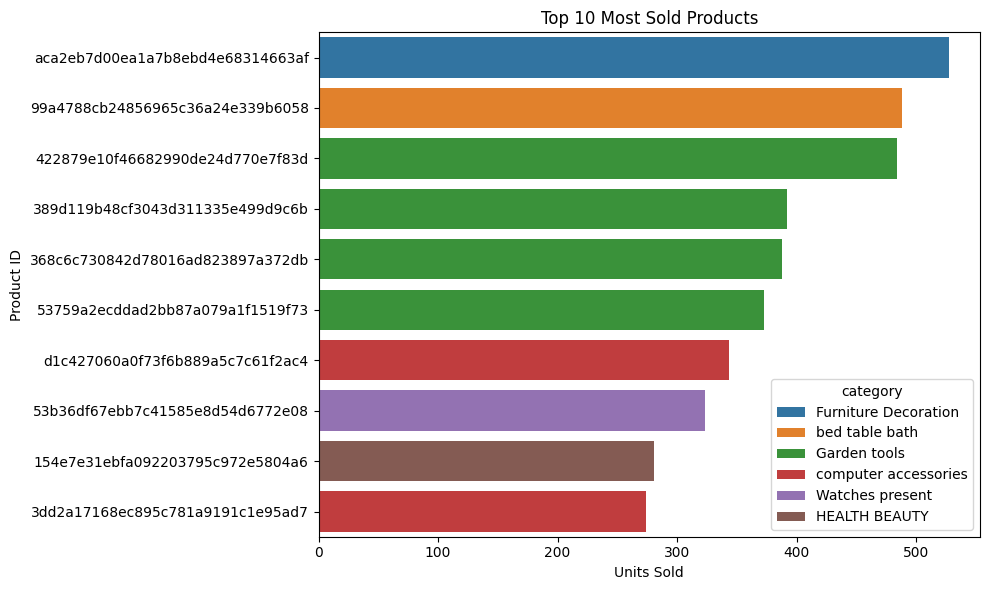

In [ ]:
query = """SELECT
    pi.product_id,
    p.[product category] AS category,
    COUNT(*) AS total_sold
FROM
    order_items pi
JOIN
    products p ON pi.product_id = p.product_id
GROUP BY
    pi.product_id, p.[product category]
ORDER BY
    total_sold DESC
LIMIT 10;"""

df_top_products = pd.read_sql_query(query, conn)

#data visualisation

plt.figure(figsize=(10,6))
sns.barplot(data=df_top_products, x='total_sold', y='product_id', hue='category', dodge=False)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Units Sold")
plt.ylabel("Product ID")
plt.tight_layout()
plt.show()

#I observe that the second most sold product belongs to the category with the highest number of products (bed_table_bath). This may suggest that product variety helps increase sales.
#we can see that the 10 most sold products come from 5 top categories
#i can conclude that these categories are important for business because they combine high variety and high sales volume. The company better fpcus on thse for promotion, advertising or stock optimization.



In [ ]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#i want to see the monthly sales trend by years

query= """SELECT
    strftime('%Y-%m', order_purchase_timestamp) AS date,
    COUNT(order_id) AS total_orders
FROM
    orders
GROUP BY
    date
ORDER BY
    date;"""
df = pd.read_sql_query(query, conn)
df


,date,total_orders
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780
5,2017-03,2682
6,2017-04,2404
7,2017-05,3700
8,2017-06,3245
9,2017-07,4026


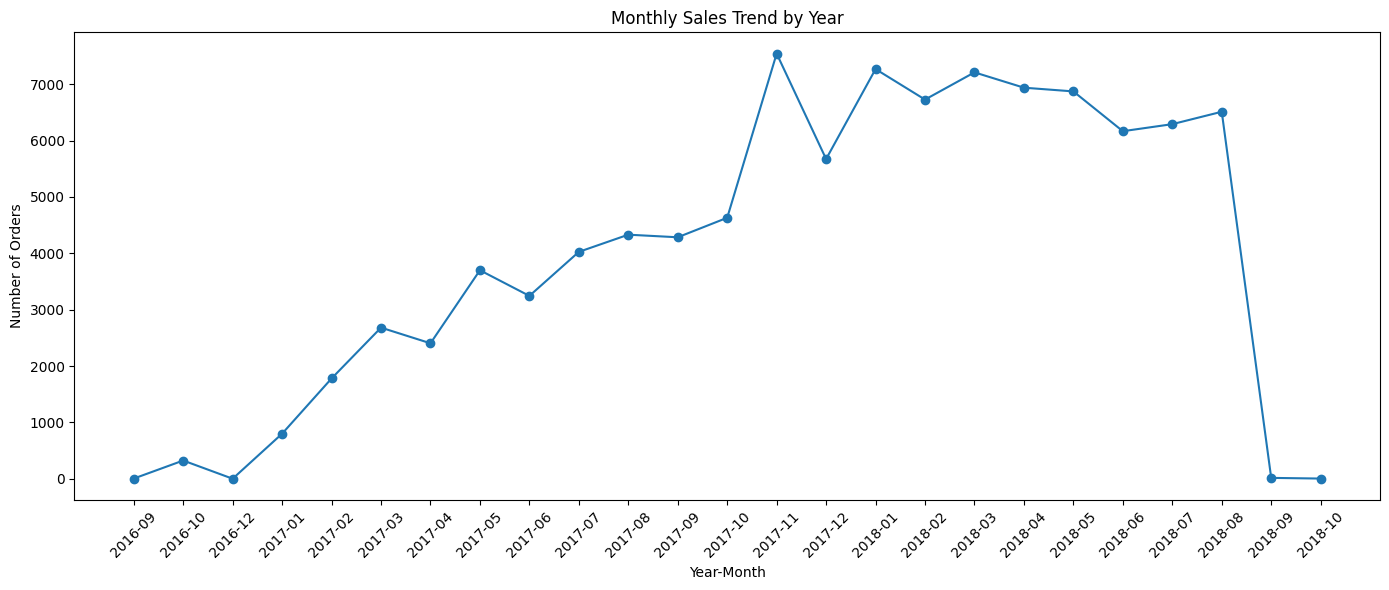

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['total_orders'], marker='o', linestyle='-')
plt.title("Monthly Sales Trend by Year")
plt.xlabel("Year-Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#i don't have enough information to talk about 2016, but I think the website was new or unknow
# in 2017 the overall trend was positive, we can observe a pic in November, (maybe discounts or a new product)
#in 2018 there have been many sales even though the overall trend is negative %% i want to see the monthly sales trend

In [ ]:
#i want to see the monthly sales trend
query="""SELECT
    strftime('%m', order_purchase_timestamp) AS month,
    COUNT(order_id) AS total_orders
FROM
    orders
GROUP BY
    month
ORDER BY
    month;"""

df = pd.read_sql_query(query, conn)
df

# we observe that the best months of sales are May, July and August (+10k orders each), and it's more complicated at the end of the year. where sales drop
#The company may start selling products for this time of the year, or make offer discounts to boost sales

#Understanding monthly trends helps improve inventory planning and marketing strategy.

,month,total_orders
0,01,8069
1,02,8508
2,03,9893
3,04,9343
4,05,10573
5,06,9412
6,07,10318
7,08,10843
8,09,4305
9,10,4959


/tmp/ipython-input-19-3208231313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='month', y='total_orders', palette='Blues_d')


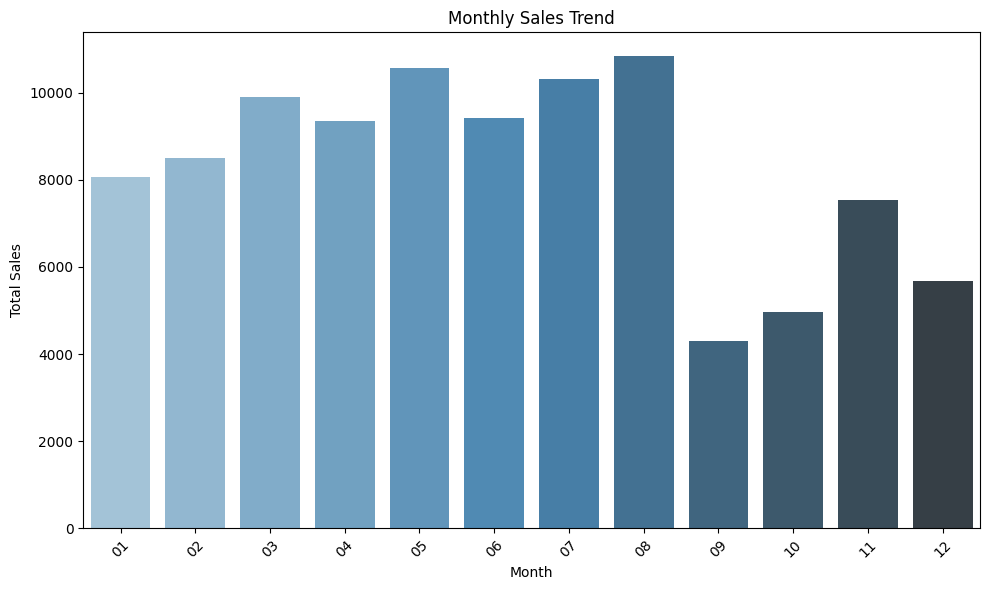

In [ ]:
#data visualisation
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='month', y='total_orders', palette='Blues_d')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
query= """SELECT
    p.[product category] AS category,
    SUM(price) AS total_revenue
FROM
    order_items oi
JOIN
    products p ON oi.product_id = p.product_id
GROUP BY
    category
ORDER BY
    total_revenue DESC
LIMIT 10;"""

df = pd.read_sql_query(query, conn)
df

,category,total_revenue
0,HEALTH BEAUTY,1258681.34
1,Watches present,1205005.68
2,bed table bath,1036988.68
3,sport leisure,988048.97
4,computer accessories,911954.32
5,Furniture Decoration,729762.49
6,Cool Stuff,635290.85
7,housewares,632248.66
8,automotive,592720.11
9,Garden tools,485256.46


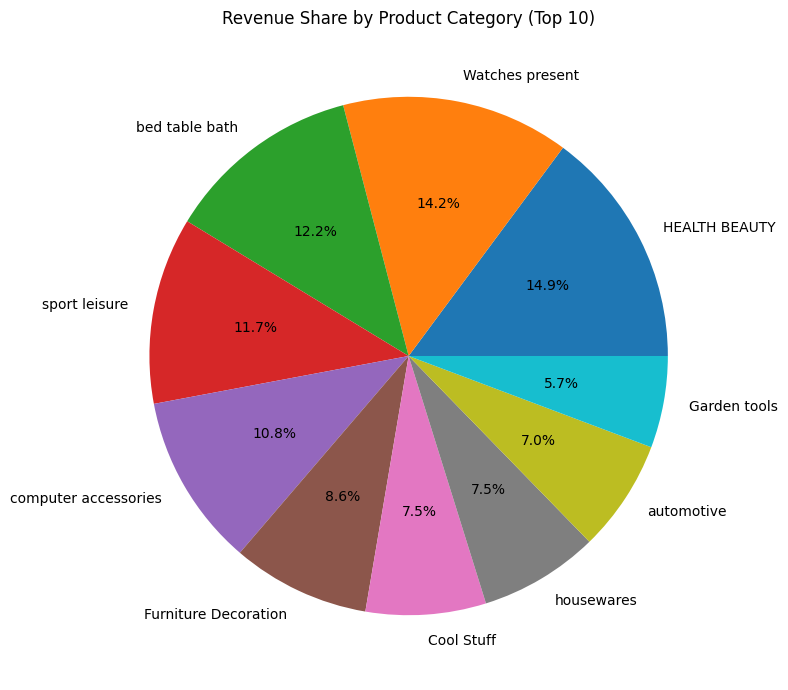

In [ ]:
#data visualisation
import matplotlib.pyplot as plt

# Take top 10 categories from the dataframe
plt.figure(figsize=(8,8))
plt.pie(df['total_revenue'], labels=df['category'], autopct='%1.1f%%')
plt.title("Revenue Share by Product Category (Top 10)")
plt.tight_layout()
plt.show()

#most of the top-selling products are from categories that also bring the highest revenue.This means that these categories are both popular and profitable.
#this shows a strong link between sales volume and revenue performance. These categories are strategic for the business
#the company shoul focus future marketing actions on these categories